In [7]:
#Neural Style transfer --> 
# A process that uses neural networks to apply artistic style from one image to another.
#output image looks like the 'content image' but “painted” in the style of the 'style img'
# we have 2 i/p images -> style image, content image

# how are we doing this?
# 1. download a pre-trained neural style transfer model from tensorflow hub
# 2. load up style and content images using tensorflow preprocessing
# 3. apply style transfer and visualize the result

# ** IMPORT DEPENDENCIES AND PRETRAINED MODEL-: 
!pip install opencv-python
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

     ---------------------------------------- 38.6/38.6 MB 3.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
#load a pre-trained model from tensorflow_hub
# hub.load method to load our stylization model  and storing it inside variable called model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [24]:
# **Preprocess image and load 
def load_image(img_path): # fn with parameter image path,to load the 2 images
    img = tf.io.read_file(img_path) #read using tenserflow io helpers 
    img = tf.image.decode_image(img, channels=3) # making sure our img has 3 channels
    img = tf.image.convert_image_dtype(img, tf.float32) # converting img datatype to float32
    img = img[tf.newaxis, :] # making sure our image is inside our new array & passing an indx that grabs the entire img
    return img

In [17]:
# using our load_imgage fn defined above
content_image = load_image(r"C:\Users\manjh\OneDrive\Desktop\portrait.jpg")
style_image = load_image(r"C:\Users\manjh\OneDrive\Desktop\painting.jpg")

In [18]:
# ** visualize o/p
content_image.shape

TensorShape([1, 697, 564, 3])

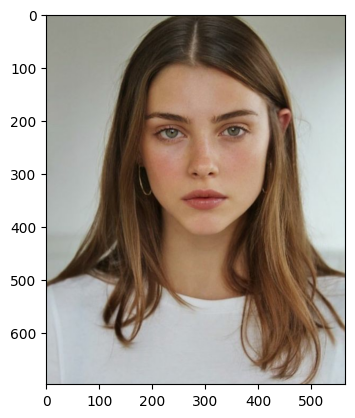

In [23]:
plt.imshow(np.squeeze(content_image)) # np.squeeze fn to extract our img from the set of array, so that matplotlib can easily visualize it
plt.show()

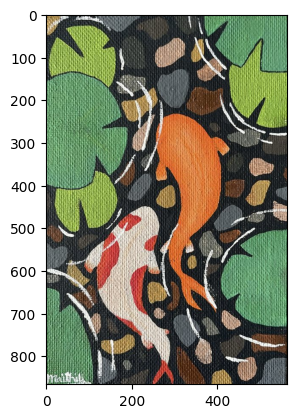

In [22]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [20]:
# ** Stylize image , performing neural style transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0] #before passing the imgs to the pre trained model we convert them into constants and extracting our first result
 

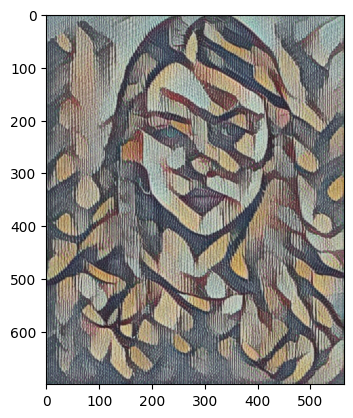

In [21]:
plt.imshow(np.squeeze(stylized_image))
plt.show()